<a href="https://colab.research.google.com/github/nkanungo/EVA6/blob/main/MNIST_Pytorch_S4_Relu_BN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required Libraries 

In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

Structure 
=====================
1. Convolution Layer of 3 x 3 Kernel with Padding of 1 
2. ReLu
3. Maxpool
4. Dropout              - Regularization Technique  
5. Batch Normalization 
6. Added Image augmentation of random rotation between -7 to +7 degrees

Additional Structures
======================
1. Convolution Layer of 1 x 1 Kernel to consolidate without convolution 
2. Global Average Pooling 

Target: 
======

In this step

1. Target is to achieve over 99.4% validation accuracy with the same number of parameters. Random rotation should help achieve this as during the visual inspection of the input images I find that few images are rotated , Hence to learn those type of images this augmentation technique should help us achieve the required accuracy %
4. Run it for 15 epochs to study how the accuracy changes with Image Augmentation technique

Result: 
======
1. Observed Train accuracy: 98.5%
2. Validation accuracy:99.37%
3. Number of parameters: 8,582


Analysis: 
========

1. Expected this change would help model achieve over 99.4 % accuracy but it stopped at 99.37% in this step. However it's slightly higher than the step-3 accuracy of 99.35%. 
2. I also observe that validation accuracy 99.37% is much higher than training accuracy 98.5%. These are because with image augmentation effect as well 
3. However points to note is that - Even after few techniques , I am still behind the target of 99.40 validation accuracy and slightly over 8000 Parameters
4. As this showed some improvement , I believe tunign further may improve the accuracy 



In [2]:
from model import model4 as Net

Steps
========
1. Install Torch Summary
2. Print Summary of model

In [3]:
from model import print_model_summary
dropout_prob = 0.1
inputsize= (1, 28, 28)
print_model_summary(dropout_prob, inputsize, Net)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 14, 28, 28]             126
              ReLU-2           [-1, 14, 28, 28]               0
       BatchNorm2d-3           [-1, 14, 28, 28]              28
         Dropout2d-4           [-1, 14, 28, 28]               0
            Conv2d-5           [-1, 14, 28, 28]           1,764
              ReLU-6           [-1, 14, 28, 28]               0
       BatchNorm2d-7           [-1, 14, 28, 28]              28
         Dropout2d-8           [-1, 14, 28, 28]               0
         MaxPool2d-9           [-1, 14, 14, 14]               0
           Conv2d-10           [-1, 14, 14, 14]           1,764
             ReLU-11           [-1, 14, 14, 14]               0
      BatchNorm2d-12           [-1, 14, 14, 14]              28
        Dropout2d-13           [-1, 14, 14, 14]               0
           Conv2d-14           [-1, 14,

G:\TSAI-ERA\Session 7\model.py:233: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Steps
=======
This is the most important step 
1. Define Train loader and Test loader with only 1 worker (MNSIT is easy dataset)
   - Normalize


In [11]:
#torch.manual_seed(1)
from dataset import get_train_loader_rotation, get_test_loader
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

batch_size = 128
rotation_range = (-7.0, 7.0)
kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = get_train_loader_rotation(batch_size, rotation_range, kwargs)
test_loader = get_test_loader(batch_size, kwargs)


Steps
=======
1. Define Lists to capture training parameters and testing parameters 


In [12]:
from tqdm import tqdm
from model import get_train, get_test

train_losses = []
test_losses = []
train_acc = []
test_acc = []   

Steps
=====
This is where the real action takes place

1. Define Learning rate and Optimizer 
2. Train for the defined epoch
3. Iterate over the training sample based on the defined batch size
4. Validate on test dataset
5. Capture outcome in the list
6. Validate 
7. Print the result


In [13]:
from torch.optim.lr_scheduler import StepLR

model =  Net(dropout_prob=0.1).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
#scheduler = StepLR(optimizer, step_size=6, gamma=0.1)
for epoch in range(1, 15):
    print('Currently Executing Epoch:', epoch)
    train_losses, train_acc = get_train(model, device, train_loader, optimizer, epoch,train_losses, train_acc)  
    test_losses, test_acc = get_test(model, device, test_loader,test_losses, test_acc)
    #scheduler.step()

Currently Executing Epoch: 1


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]G:\TSAI-ERA\Session 7\model.py:233: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
Loss=0.23664957284927368 Batch_id=468 Accuracy=88.19: 100%|██████████████████████████| 469/469 [01:11<00:00,  6.57it/s]



Test set: Average loss: 0.0703, Accuracy: 9781/10000 (97.81%)

Currently Executing Epoch: 2


Loss=0.30126670002937317 Batch_id=468 Accuracy=96.49: 100%|██████████████████████████| 469/469 [01:24<00:00,  5.55it/s]



Test set: Average loss: 0.0413, Accuracy: 9873/10000 (98.73%)

Currently Executing Epoch: 3


Loss=0.058414701372385025 Batch_id=468 Accuracy=97.14: 100%|█████████████████████████| 469/469 [01:23<00:00,  5.61it/s]



Test set: Average loss: 0.0335, Accuracy: 9894/10000 (98.94%)

Currently Executing Epoch: 4


Loss=0.16090993583202362 Batch_id=468 Accuracy=97.52: 100%|██████████████████████████| 469/469 [01:25<00:00,  5.45it/s]



Test set: Average loss: 0.0303, Accuracy: 9903/10000 (99.03%)

Currently Executing Epoch: 5


Loss=0.09565029293298721 Batch_id=468 Accuracy=97.81: 100%|██████████████████████████| 469/469 [01:37<00:00,  4.82it/s]



Test set: Average loss: 0.0280, Accuracy: 9917/10000 (99.17%)

Currently Executing Epoch: 6


Loss=0.15395092964172363 Batch_id=468 Accuracy=97.92: 100%|██████████████████████████| 469/469 [01:28<00:00,  5.28it/s]



Test set: Average loss: 0.0288, Accuracy: 9913/10000 (99.13%)

Currently Executing Epoch: 7


Loss=0.01683006063103676 Batch_id=468 Accuracy=98.01: 100%|██████████████████████████| 469/469 [01:25<00:00,  5.46it/s]



Test set: Average loss: 0.0253, Accuracy: 9909/10000 (99.09%)

Currently Executing Epoch: 8


Loss=0.024662857875227928 Batch_id=468 Accuracy=98.22: 100%|█████████████████████████| 469/469 [01:25<00:00,  5.49it/s]



Test set: Average loss: 0.0223, Accuracy: 9932/10000 (99.32%)

Currently Executing Epoch: 9


Loss=0.03514545038342476 Batch_id=468 Accuracy=98.22: 100%|██████████████████████████| 469/469 [01:21<00:00,  5.75it/s]



Test set: Average loss: 0.0218, Accuracy: 9922/10000 (99.22%)

Currently Executing Epoch: 10


Loss=0.02151946909725666 Batch_id=468 Accuracy=98.27: 100%|██████████████████████████| 469/469 [01:21<00:00,  5.75it/s]



Test set: Average loss: 0.0232, Accuracy: 9927/10000 (99.27%)

Currently Executing Epoch: 11


Loss=0.10253962874412537 Batch_id=468 Accuracy=98.27: 100%|██████████████████████████| 469/469 [01:22<00:00,  5.72it/s]



Test set: Average loss: 0.0230, Accuracy: 9922/10000 (99.22%)

Currently Executing Epoch: 12


Loss=0.05122940614819527 Batch_id=468 Accuracy=98.34: 100%|██████████████████████████| 469/469 [01:22<00:00,  5.67it/s]



Test set: Average loss: 0.0231, Accuracy: 9924/10000 (99.24%)

Currently Executing Epoch: 13


Loss=0.032553382217884064 Batch_id=468 Accuracy=98.41: 100%|█████████████████████████| 469/469 [01:21<00:00,  5.73it/s]



Test set: Average loss: 0.0218, Accuracy: 9923/10000 (99.23%)

Currently Executing Epoch: 14


Loss=0.02671629749238491 Batch_id=468 Accuracy=98.50: 100%|██████████████████████████| 469/469 [01:21<00:00,  5.74it/s]



Test set: Average loss: 0.0203, Accuracy: 9937/10000 (99.37%)



Steps
====
Visualization of Training and Validation Parameters
   - Loss 
   - Accuracy
   

In [7]:
from utils import plot_loss

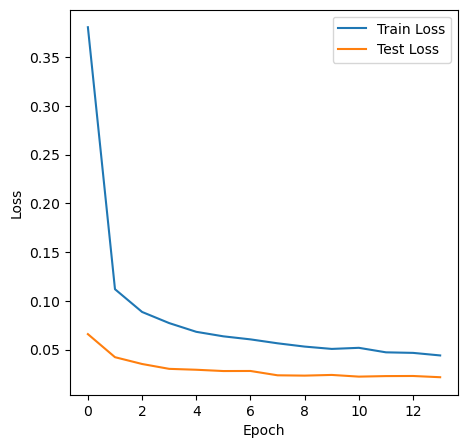

In [8]:
plot_loss(train_losses, test_losses)

In [9]:
from utils import plot_accuracy

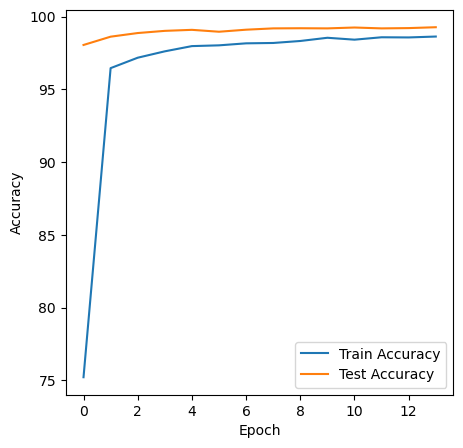

In [10]:
plot_accuracy(train_acc, test_acc)

Summary
=========
